How to write neural networks for classification problems

#Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

n_samples=1000

X,y=make_circles(n_samples,noise=0.03,random_state=42)

In [2]:
##checking the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
#checking the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [4]:
import pandas as pd
circles=pd.DataFrame({
    "X0":X[:,0],
    "X1":X[:,1],
    "label":y
})

circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [5]:
import matplotlib.pyplot as plt

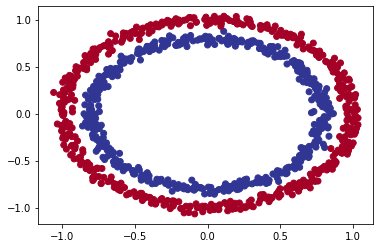

In [6]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

In [7]:
##Input and output shapes
X.shape,y.shape

((1000, 2), (1000,))

#steps in modelling

In [8]:
import tensorflow as tf

In [9]:


tf.random.set_seed(42)

#create a model
model_1=tf.keras.Sequential([tf.keras.layers.Dense(1)])

#compiling the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 870us/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 930us/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 934us/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 877us/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830


In [10]:
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 683us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [11]:
##adding extra layers for improving the model
tf.random.set_seed(42)

model_2=tf.keras.Sequential([
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(10)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),metrics=["accuracy"])
model_2.fit(X,y,epochs=100,verbose=0)




In [12]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 777us/step - loss: 0.6932 - accuracy: 0.2410


[0.6931511163711548, 0.2409999966621399]

#improving our model

##Common ways to to improve a deep learning model
1)Adding lyers
2)Increase the number of hidden units
3)Change the activation function
4)Change the optimization function
5)Change the learning rate
6)Fitting on more data
7)Fitting for longer

In [13]:
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(X,y,epochs=100,verbose=0)



In [14]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 700us/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254054069519, 0.5080000162124634]

In [15]:
import numpy as np







In [16]:
def plot_decision_boundary(model,X,y):

  #Define the axis boundaries of the plot and create a meshgrid
  x_min,x_max=X[:,0].min()-0.1,X[:,0].max()+0.1
  y_min,y_max=X[:,1].min()-0.1,X[:,1].max()+0.1

  xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))

  #create X value 
  x_in=np.c_[xx.ravel(),yy.ravel()] #stack 2D arrays together

  #make a predictions
  y_pred=model.predict(x_in)

  #check for multi-class
  if len(y_pred[0]) > 1:
    print("Doing multiclass classification")
    y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("Doing binary classification")
    y_pred=np.round(y_pred).reshape(xx.shape)
  #plot the decision boundary

  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,aplha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())




Doing binary classification


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: The following kwargs were not used by contour: 'aplha'


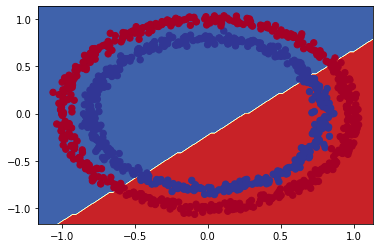

In [17]:
plot_decision_boundary(model=model_3,X=X,y=y)

In [18]:
##Using our model for Regression
tf.random.set_seed(42)

#Create some regression technique
X_regression=tf.range(0,1000,5)
y_regression=tf.range(100,1100,5)#y=x+100

#splittting our data into training and test data

X_reg_train=X_regression[:150]
X_reg_test=X_regression[150:]

y_reg_train=y_regression[:150]
y_reg_test=y_regression[150:]


#fit our model to the regression data
#model_3.fit(X_reg_train,y_reg_train,epochs=100)

In [19]:
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_3.fit(X_reg_train,y_reg_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

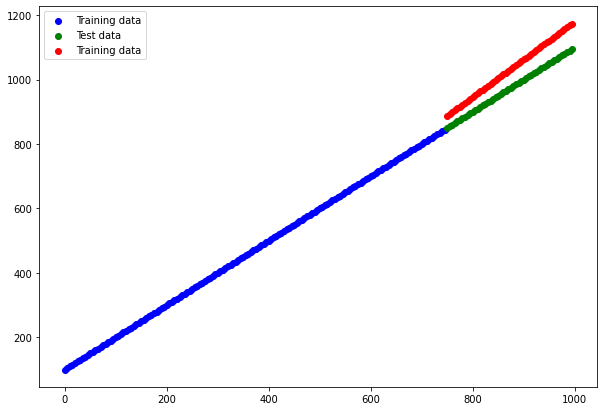

In [20]:
y_reg_preds=model_3.predict(X_reg_test)
plt.figure(figsize=(10,7))

plt.scatter(X_reg_train,y_reg_train,c="b",label="Training data")
plt.scatter(X_reg_test,y_reg_test,c="g",label="Test data")
plt.scatter(X_reg_test,y_reg_preds,c="r",label="Training data")

plt.legend();


In [21]:
##6/11/21
tf.random.set_seed(42)

model_4=tf.keras.Sequential([
                             tf.keras.layers.Dense(1,activation=tf.keras.activations.linear),
])


model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history=model_4.fit(X,y,epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
32/32 [==============================] - 0s 851us/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 808us/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 976us/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 892us/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 851us/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 855us/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 913us/step - loss: 3.7547 - accuracy: 0.

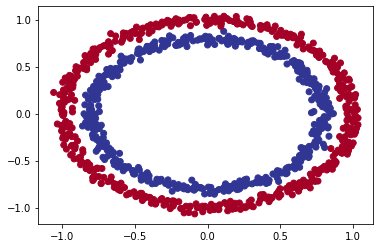

In [22]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

Doing binary classification


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: The following kwargs were not used by contour: 'aplha'


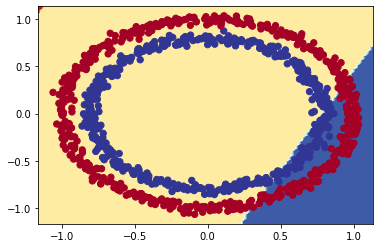

In [23]:
#checking decision boundary
plot_decision_boundary(model=model_4,X=X,y=y)

Building a neural network with non linear activation function

In [24]:
tf.random.set_seed(42)

model_5=tf.keras.Sequential([
                             tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history=model_5.fit(X,y,epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
32/32 [==============================] - 0s 763us/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 884us/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1000us/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 906us/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 888us/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 859us/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 807us/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 848us/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 834us/step - loss: 3.7547 - accurac

In [25]:
tf.random.set_seed(42)

model_6=tf.keras.Sequential([
                             tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(4,activation=tf.keras.activations.relu)
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history=model_6.fit(X,y,epochs=100)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
32/32 [==============================] - 0s 952us/step - loss: 3.2091 - accuracy: 0.0010
Epoch 2/100
32/32 [==============================] - 0s 898us/step - loss: 2.6774 - accuracy: 0.0050
Epoch 3/100
32/32 [==============================] - 0s 850us/step - loss: 2.5260 - accuracy: 0.0100
Epoch 4/100
32/32 [==============================] - 0s 901us/step - loss: 2.4545 - accuracy: 0.0220
Epoch 5/100
32/32 [==============================] - 0s 985us/step - loss: 2.3271 - accuracy: 0.0420
Epoch 6/100
32/32 [==============================] - 0s 938us/step - loss: 1.9320 - accuracy: 0.0790
Epoch 7/100
32/32 [==============================] - 0s 859us/step - loss: 1.6530 - accuracy: 0.1220
Epoch 8/100
32/32 [==============================] - 0s 923us/step - loss: 1.5982 - accuracy: 0.1320
Epoch 9/100
32/32 [==============================] - 0s 914us/step - loss: 1.5331 - accuracy: 0.1440
Epoch 10/100
32/32 [==============================] - 0s 913us/step - loss: 1.4113 - accura

In [26]:
#Evaluate 
model_6.evaluate(X,y)

32/32 [==============================] - 0s 775us/step - loss: 0.6643 - accuracy: 0.3780


[0.6642979979515076, 0.3779999911785126]

Doing multiclass classification


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: The following kwargs were not used by contour: 'aplha'


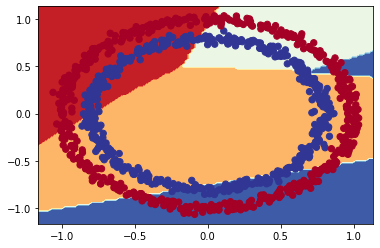

In [27]:
plot_decision_boundary(model_6,X,y)

In [28]:
tf.random.set_seed(42)

model_7=tf.keras.Sequential([
                             tf.keras.layers.Dense(4,activation="relu"),
                             tf.keras.layers.Dense(4,activation="relu"),
                             tf.keras.layers.Dense(1,activation="sigmoid")
])

model_7.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)

model_7.fit(X,y,epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
32/32 [==============================] - 0s 952us/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 934us/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 932us/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 935us/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 981us/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 919us/step - loss: 0.6766 - accuracy: 0.55

In [29]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 778us/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

Doing binary classification


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: The following kwargs were not used by contour: 'aplha'


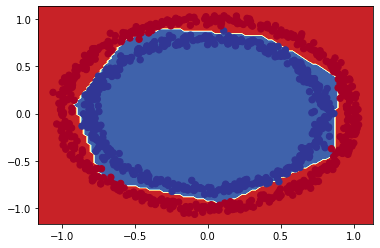

In [30]:
plot_decision_boundary(model_7,X,y)

In [31]:
A=tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

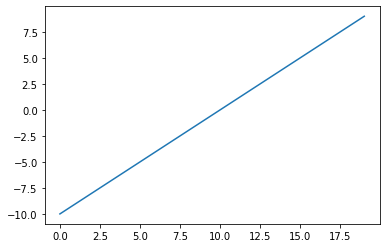

In [32]:
plt.plot(A)

In [33]:
##lets try repliating sigmoid(x) = 1 / (1 + exp(-x)) 
def sigmoid(x):
  return 1/(1+tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

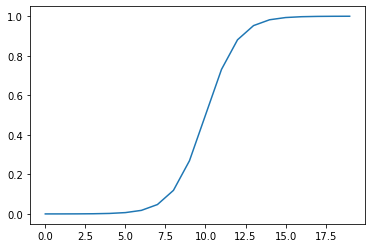

In [34]:
plt.plot(sigmoid(A))

In [35]:
##replicating relu
def relu(x):
  return tf.maximum(0,x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

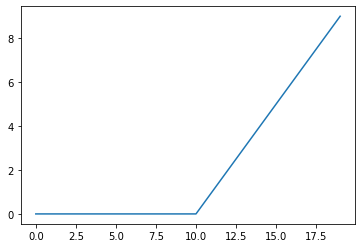

In [36]:
plt.plot(relu(A))

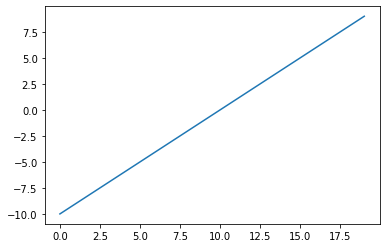

In [37]:
plt.plot(A)

In [38]:
##replicating linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

Evaluating and improving our classifications

In [39]:
X,y#

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [40]:
##splitting into train and test

X_train=X[:800]
y_train=y[:800]
X_test,y_test=X[800:],y[800:]
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [41]:
tf.random.set_seed(42)

model_8=tf.keras.Sequential([
                             tf.keras.layers.Dense(4,activation="relu"),
                             tf.keras.layers.Dense(4,activation="relu"),
                             tf.keras.layers.Dense(1,activation="sigmoid")
])

model_8.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    metrics=["accuracy"]
)

history=model_8.fit(X_train,y_train,epochs=25)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/25
25/25 [==============================] - 0s 982us/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 963us/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 941us/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 936us/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 975us/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 985us/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 1

In [42]:
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.1247 - accuracy: 1.0000


[0.1246885359287262, 1.0]

Doing binary classification


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: The following kwargs were not used by contour: 'aplha'


Doing binary classification


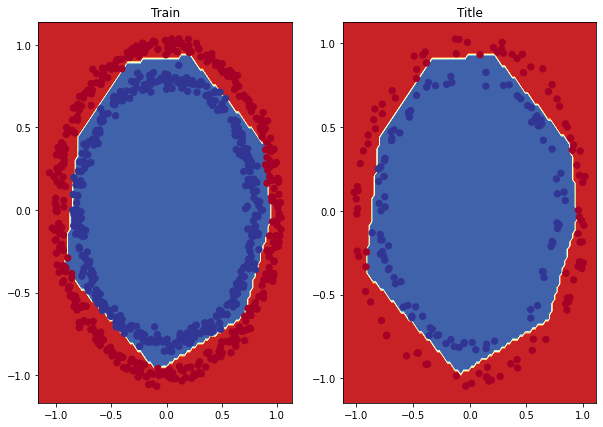

In [43]:
##plot decision boundaries fr trainiga dn testing data
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("Train")

plot_decision_boundary(model_8,X_train,y_train)

plt.subplot(1,2,2)
plt.title("Title")

plot_decision_boundary(model_8,X_test,y_test)
plt.show()


##Plot the Loss(or training) curve

In [45]:
##lets convert history object into  Data Frame
pd.DataFrame(history.history)_

SyntaxError: ignored

Text(0.5, 1.0, 'Model_8 loss curves')

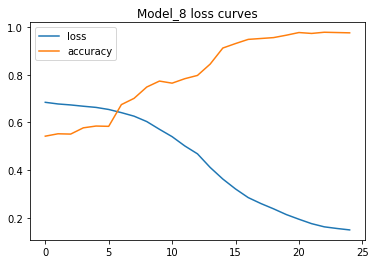

In [46]:
##plot the loss curve
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

In [ ]:
##for many problems that the loss function decreasing means model is improving

##Finding the best learning rate
#-It is basically the point where the loss decrease the most
##steps-
#A learning rate **callback**
#A modified loss curves plot


In [47]:
tf.random.set_seed(42)

model_9=tf.keras.Sequential([
                             tf.keras.layers.Dense(4,activation="relu"),
                             tf.keras.layers.Dense(4,activation="relu"),
                             tf.keras.layers.Dense(1,activation="sigmoid")

])


model_9.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)


##creating a learning rate callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 * 10**(epoch/20))


history_9=model_9.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 861us/step - loss: 0.6945 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 931us/step - loss: 0.6938 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 861us/step - loss: 0.6930 - accuracy: 0.4963
Epoch 4/100
25/25 [==============================] - 0s 827us/step - loss: 0.6922 - accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 847us/step - loss: 0.6914 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 982us/step - loss: 0.6906 - accuracy: 0.5013
Epoch 7/100
25/25 [==============================] - 0s 992us/step - loss: 0.6898 - accuracy: 0.4950
Epoch 8/100
25/25 [==============================] - 0s 899us/step - loss: 0.6889 - accuracy: 0.5038
Epoch 9/100
25/25 [==============================] - 0s 905us/step - loss: 0.6880 - accuracy: 0.5013
Epoch 10/100
25/25 [==============================] - 0s 872us/step - loss: 0.6871 - accura

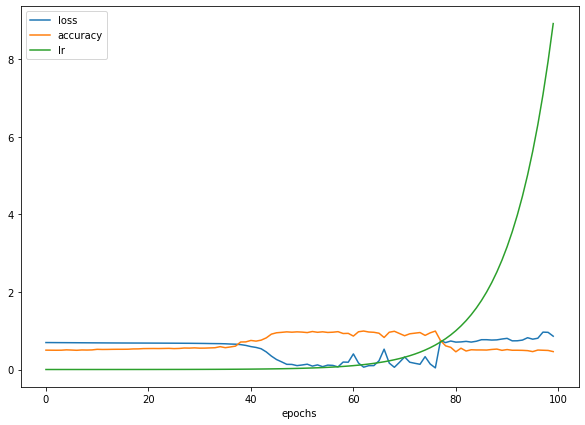

In [48]:
pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs Loss')

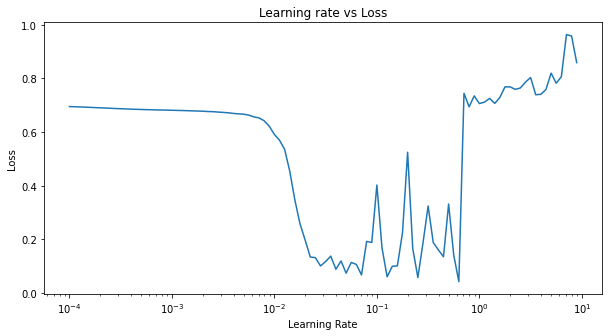

In [49]:
##plot the learning rate vs loss
lrs=1e-4*(10**(tf.range(100)/20))
plt.figure(figsize=(10,5))
plt.semilogx(lrs,history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [51]:
 tf.random.set_seed(42)

 model_10=tf.keras.Sequential(
     [
      tf.keras.layers.Dense(4,activation="relu"),
      tf.keras.layers.Dense(4,activation="relu"),
      tf.keras.layers.Dense(1,activation="sigmoid")
     ]
 )

model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.01),
                 metrics=["accuracy"])

history_10=model_10.fit(X_train,y_train,epochs=20)





/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
25/25 [==============================] - 0s 969us/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/20
25/25 [==============================] - 0s 970us/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/20
25/25 [==============================] - 0s 919us/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/20
25/25 [==============================] - 0s 942us/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/20
25/25 [==============================] - 0s 920us/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/20
25/25 [==============================] - 0s 988us/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/20
25/25 [==============================] - 0s 984us/step - loss: 0.5714 - accuracy: 0.7738
Epoch

In [52]:
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.1913 - accuracy: 0.9600


[0.19134360551834106, 0.9599999785423279]

In [53]:
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.1247 - accuracy: 1.0000


[0.1246885359287262, 1.0]

Doing binary classification
Doing binary classification


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: The following kwargs were not used by contour: 'aplha'


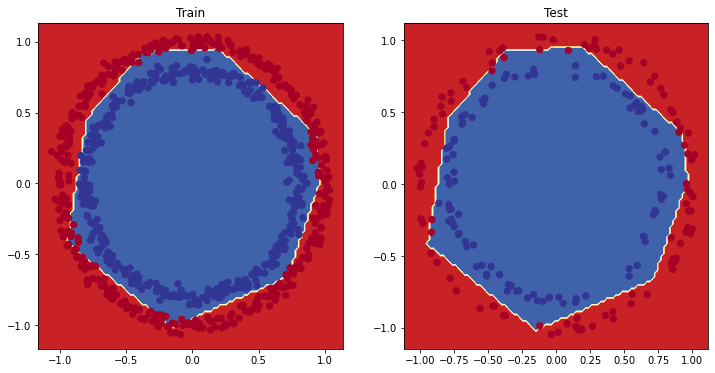

In [57]:
##Plot the decision boundaries for the training and test set
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")

plot_decision_boundary(model_10,X_train,y_train)

plt.subplot(1,2,2)
plt.title("Test")

plot_decision_boundary(model_10,X_test,y_test)
plt.show()

##More classification methods

##Accuracy
##Precision
##Recall
##F1-score
##Confusion Matrix
##Classification report


In [58]:
loss,accuracy=model_10.evaluate(X_test,y_test)
print(f"Model loss on the test set:{loss}")
print(f"Model accuracy on the test set:{(accuracy*100):.2f}")

7/7 [==============================] - 0s 1ms/step - loss: 0.1913 - accuracy: 0.9600
Model loss on the test set:0.19134360551834106
Model accuracy on the test set:96.00


In [59]:
from sklearn.metrics import confusion_matrix

#Make predictions
y_preds=model_10.predict(X_test)

confusion_matrix(y_test,y_preds)

ValueError: ignored

In [61]:
y_test[:10],y_preds[:10]

(array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0]), array([[0.8587259 ],
        [0.9725213 ],
        [0.8282254 ],
        [0.9354641 ],
        [0.12238917],
        [0.08754602],
        [0.8096864 ],
        [0.34614876],
        [0.98475313],
        [0.25547862]], dtype=float32))

#prediction array has come out in the for of prediction probability


##Convert prediction probability to binary format 

In [62]:
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [65]:
confusion_matrix(y_test,tf.round(y_preds))

array([[93,  8],
       [ 0, 99]])

In [68]:
import itertools

figsize=(10,10)

cm=confusion_matrix(y_test,tf.round(y_preds))

cm_norm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis] ##to normalize


In [69]:
cm_norm

array([[0.92079208, 0.07920792],
       [0.        , 1.        ]])

##Working with a larger example
##multiclass classification

In [70]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [71]:
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training labels:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [73]:
##check the shape of a single example
train_data[0].shape,train_labels[0].shape

((28, 28), ())

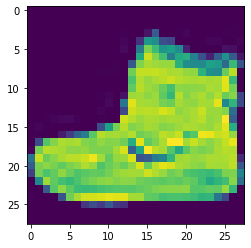

In [74]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [75]:
train_labels[0]

9

In [76]:
'''-shirt/top
1 	Trouser
2 	Pullover
3 	Dress
4 	Coat
5 	Sandal
6 	Shirt
7 	Sneaker
8 	Bag
9 	Ankle boot'''
class_names=['shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

len(class_names)

10

Text(0.5, 1.0, 'shirt/top')

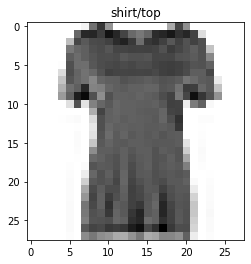

In [77]:
index_of_choice=10
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

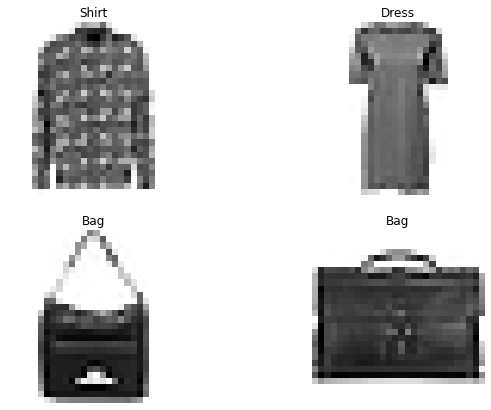

In [78]:
##Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(10,7))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))

  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])

  plt.axis(False)

##Building a multi-class classification

In [79]:
train_data[0].shape

(28, 28)

In [80]:
len(class_names)

10

##if your labels are one-hot encoded,use CaterogicalCrosentropy(),
##if labels are in integers , use SparseCaterogicalCrosentropy

In [83]:
tf.random.set_seed(42)
model_11=tf.keras.Sequential(
    [#i/p size is 28*28
     tf.keras.layers.Flatten(input_shape=(28,28)),
     tf.keras.layers.Dense(4,activation="relu"),
     tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
    ]
)

model_11.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)


history_11=model_11.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.1643 - accuracy: 0.1609 - val_loss: 1.8304 - val_accuracy: 0.2048
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.7084 - accuracy: 0.2484 - val_loss: 1.6614 - val_accuracy: 0.2850
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6351 - accuracy: 0.2837 - val_loss: 1.6084 - val_accuracy: 0.2756
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6108 - accuracy: 0.2912 - val_loss: 1.6029 - val_accuracy: 0.3046
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6025 - accuracy: 0.2993 - val_loss: 1.5837 - val_accuracy: 0.3139
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5838 - accuracy: 0.3120 - val_loss: 1.5673 - val_accuracy: 0.3281
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5788 - accuracy: 0.3183 - val_loss: 1.5687 - val_accuracy:

In [84]:
model_11.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_32 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_33 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [85]:
#Steps in modelling with Tenserflow
##1)Turn all data into integers
##2)Make sure all of your tensors are the right shape
##3)Scale features (normalize or standard,neural networks tend to prefer normalization)

In [86]:
train_data.min(),train_data.max()

(0, 255)

In [87]:
##We can get our training and testing data between 0 and 1 by dividing by the maximum

train_data_norm=train_data/255.0
test_data_norm=test_data/255.0

train_data_norm.min(),train_data_norm.max()

(0.0, 1.0)

In [89]:
##Normalize data 
tf.random.set_seed(42)

model_12=tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(4,activation="relu"),
                              tf.keras.layers.Dense(4,activation="relu"),
                              tf.keras.layers.Dense(10,activation="softmax")

])

model_12.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.optimizers.Adam(),
    metrics=["accuracy"]
)

norm_history=model_12.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

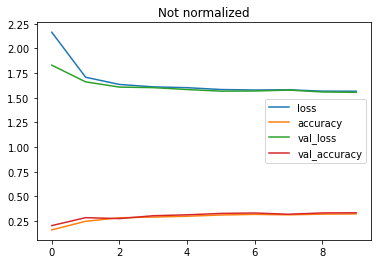

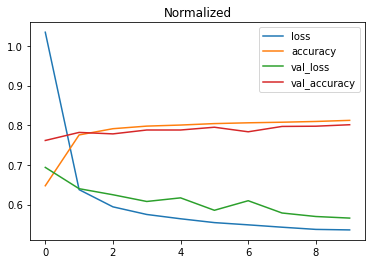

In [90]:
import pandas as pd
pd.DataFrame(history_11.history).plot(title="Not normalized")
pd.DataFrame(norm_history.history).plot(title="Normalized")

In [93]:
##finding the ideal learning rate
tf.random.set_seed(42)

model_13=tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(28,28))
                              ,
                              tf.keras.layers.Dense(4,activation="relu"),
                              tf.keras.layers.Dense(4,activation="relu"),
                              tf.keras.layers.Dense(10,activation="softmax")
])
model_13.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))

find_lr_history=model_13.fit(
    train_data_norm,train_labels,epochs=40,validation_data=(test_data_norm,test_labels),
    callbacks=[lr_scheduler]
)



Epoch 1/40
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

Text(0.5, 1.0, 'Finding the ideal learning rate')

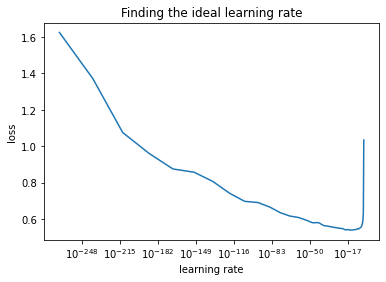

In [95]:
##plot the learning rate curve
import matplotlib.pyplot as plt


lrs=1e-3**(10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])

plt.xlabel("learning rate")
plt.ylabel("loss")

plt.title("Finding the ideal learning rate")


In [98]:
def plot_random_image(model,images,true_labels,classes):
  #set a random integer
  i=random.randomint(0,len(images))

  #create predictions and targets
  target_image=imagesimages[i]
  pred_probs=model.predict(target_image.reshape(1,28,20))

  pred_label=classes(pred_probs.argmax())
  true_label=classes((true_labels[i]))

  #plot the image
  plt.imshow(target_image,cmap=plt.cm.binary)

  #change the color of the titles depending on if the predictions is right or wrong
  if pred_label == true_label:
    color="green"
  else:
    color="red"
  plt.xlabel("Pred:{}{:2.0f}%(True{})".format(pred_label,100*tf.reduce_max(pred_probs),true_label),color=color)






In [97]:
plot_random_image(model_13,images=test_data,true_labels=test_labels,classes=class_names)

AttributeError: ignored

In [112]:
def plot_random_image(model,images,true_labels,classes):
  #set a random integer
  i=random.randint(0,len(images))

  #create predictions and targets
  target_image=images[i]
  pred_probs=model.predict(target_image.reshape(1,28,28))

  pred_label=classes[pred_probs.argmax()]
  true_label=classes[(true_labels[i])]

  #plot the image
  plt.imshow(target_image,cmap=plt.cm.binary)

  #change the color of the titles depending on if the predictions is right or wrong
  if pred_label == true_label:
    color="green"
  else:
    color="red"
  plt.xlabel("Pred:{}{:2.0f}%(True{})".format(pred_label,100*tf.reduce_max(pred_probs),true_label),color=color)

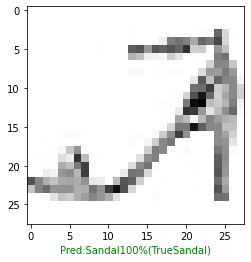

In [113]:
plot_random_image(model_13,images=test_data,true_labels=test_labels,classes=class_names)